# 1. Introduction

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib

# 2. Using Matplotlib in a Non-Pythonic Way

## 2.1 Get some date-monthly time series.

In [2]:
x = pd.period_range('1980-01-01',periods=410,freq='M')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(len(x)).cumsum()

## 2.2 Plot the data.

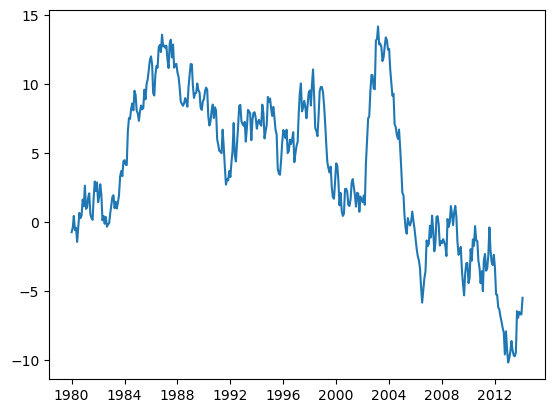

In [3]:
plt.plot(x,y,label='FDI')

## 2.3 Add your labels and pretty-up the plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


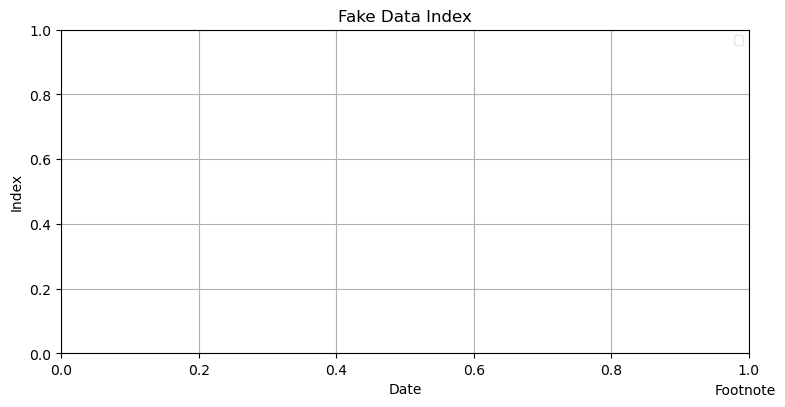

In [11]:
plt.title('Fake Data Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.figtext(0.995,0.01,'Footnote',ha='right',va='bottom')
plt.legend(loc='best',framealpha=0.5,prop={'size':'small'})
plt.tight_layout(pad=1)
plt.gcf().set_size_inches(8,4)

## 2.4 Save the figure.

In [7]:
plt.savefig('filename.png')

<Figure size 640x480 with 0 Axes>

## 2.5 Finally, close the figure.

In [8]:
plt.close()

# 3. Matplotlib: Intro to the Object Oriented Way

**Figure:** Figure is the top-level container for everything on a 
canvas. It was obtained from the global Figure factory.
```
fig = plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None)
```
1. num – integer or string identifier of figure
> if num exists, it is selected
> if num is None, a new one is allocated
2. figsize – tuple of (width, height) in inches
3. dpi – dots per inch
4. facecolor – background 
5. edgecolor – border

## 3.1 Iterating over open figures:

In [12]:
for i in plt.get_fignums():
    fig = plt.figure(i)
    # get the figure
    
    print(fig.number)
    # do something

## 3.2 Close a figure

```
plt.close(fig.number) # close figure
plt.close() # close the current figure
plt.close(i) # close figure numbered i
plt.close(name) # close figure by str name
plt.close('all')# close all figures
```

## 3.3 An axes or subplot (a subclass of axes)

```
ax = fig.add_subplot(2,2,1) # row-col-num
ax = fig.add_axes([0.1,0.1,0.8,0.8])
```

## 3.4 All at once

```
fig, ax = plt.subplots()
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,4))
```

## 3.5 Iterating the axes within a figure

```
for ax in fig.get_axes():
    pass # do something
```

## 3.6 Remove an axes from a figure

```
fig.delaxes(ax)
```

# 4. Line Plots - Using ax.plot()

## 4.1 Single plot constructed with figure and axes

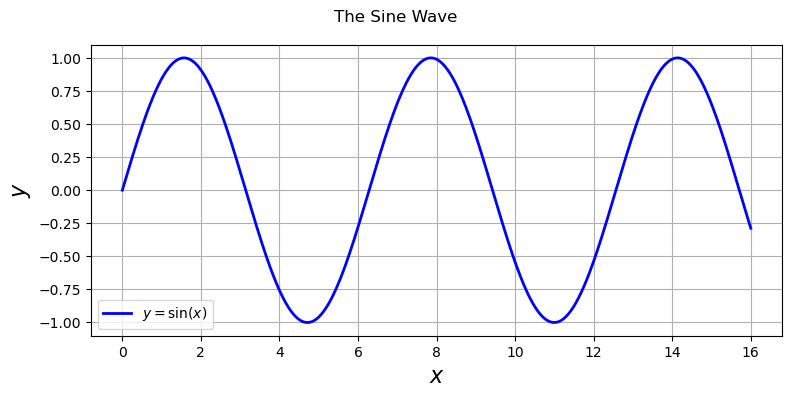

In [15]:
# get data
x = np.linspace(0,16,800)
y = np.sin(x)

# get an empty figure and add an axes
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1) # row, col, num

# line plot data on the axes
ax.plot(x,y,'b-',linewidth=2,label=r'$y=\sin(x)$')

# add title, labels and legend, etc.
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.legend(loc='best')
ax.grid(True)
fig.suptitle('The Sine Wave')
fig.tight_layout(pad=1)
fig.savefig('filename1.png',dpi=125)

## 4.2 Multiple lines with markers on a line plot

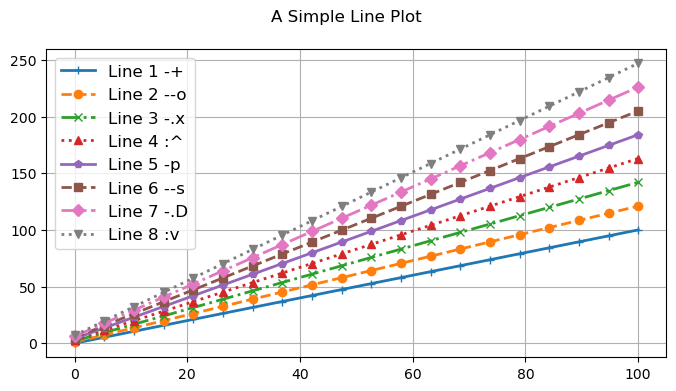

In [18]:
# --- get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))
# --- plot some lines
N = 8 # the number of lines we will plot
styles = ['-', '--', '-.', ':']
markers = list('+ox^psDv')
x = np.linspace(0, 100, 20)
for i in range(N): # add line-by-line
     y = x + x/5*i + i
     s = styles[i % len(styles)]
     m = markers[i % len(markers)]
     ax.plot(x, y, 
             label='Line '+str(i+1)+' '+s+m,
             marker=m, linewidth=2, linestyle=s)
# --- add grid, legend, title and save
ax.grid(True)
ax.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple Line Plot')
fig.savefig('filename1.png', dpi=125)

# 5. Scatter Plots - Using ax.scatter()

## 5.1 A simple scatter plot

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

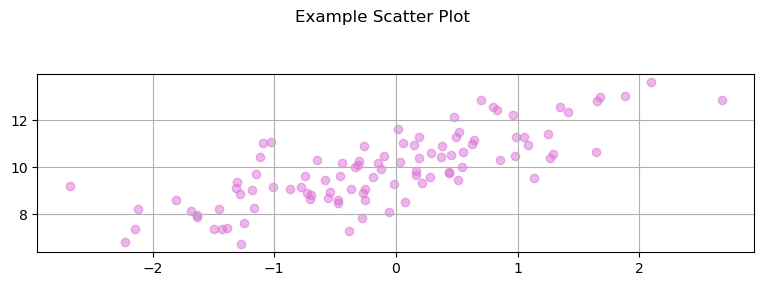

In [4]:
x = np.random.randn(100)
y = x + np.random.randn(100)+10
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x,y,alpha=0.5,color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename3.png', dpi=125)

## 5.2 Add a regression line (using statsmodel)

In [5]:
import statsmodels.api as sm

x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model = sm.OLS(y,x)
fitted = model.fit()

x_pred = np.linspace(x.min(),x.max(),50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)

ax.plot(x_pred,y_pred,'-',color='darkorchid',linewidth=2)
fig.savefig('filename4.png',dpi=125)

## 5.3 Add confidence bands for the regression line

In [6]:
y_hat = fitted.predict(x)
y_err = y-y_hat
mean_x = x.T[1].mean()
n = len(x)
dof = n - fitted.df_model-1

from scipy import stats

t = stats.t.ppf(1-0.025,df=dof) # 2-tail
s_err = np.sum(np.power(y_err,2))

conf = t * np.sqrt((s_err/(n-2))*(1.0/n + \
                                 (np.power((x_pred-mean_x),2) / \
                                 ((np.sum(np.power(x_pred,2))) - \
                                 n*(np.power(mean_x,2))))))

upper = y_pred+abs(conf)
lower = y_pred-abs(conf)

ax.fill_between(x_pred,lower,upper,color='#888888',alpha=0.3)
fig.savefig('filename5.png',dpi=125)

## 5.4 Add a prediction interval for the regression line

In [7]:
from statsmodels.sandbox.regression.predstd \
    import wls_prediction_std

sdev, lower, upper = wls_prediction_std(
                        fitted,exog=x_pred2,alpha=0.05
                    )

ax.fill_between(
    x_pred,lower,upper,color='#888888',alpha=0.1
)
fig.savefig('filename6.png',dpi=125)

**Note:** 
1. The confidence interval relates to the location of 
the regression line. 
2. The predication interval relates to 
the location of data points around the regression line. 

## 5.5 Changing the marker size and colour

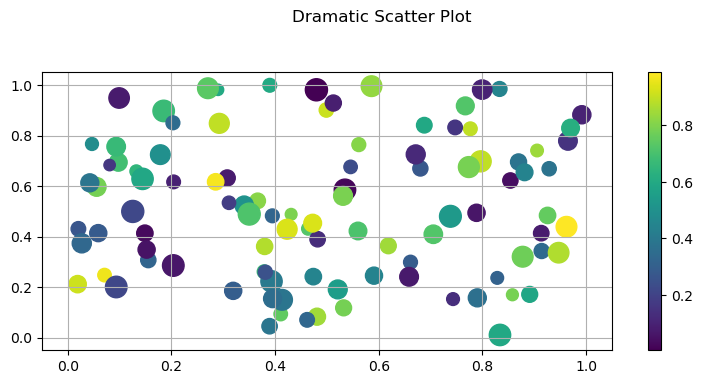

In [12]:
n = 100
x = np.random.rand(n)
y = np.random.rand(n)
size = ( (np.random.rand(n)+1) * 8) **2
colours = np.random.rand(n)

fig, ax = plt.subplots(figsize=(8,4))
l = ax.scatter(x,y,s=size,c=colours)
fig.colorbar(l)
ax.set_xlim((-0.05,1.05))
ax.set_ylim((-0.05,1.05))
fig.suptitle('Dramatic Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename7.png',dpi=125)

## 5.6 Changing the marker symbol

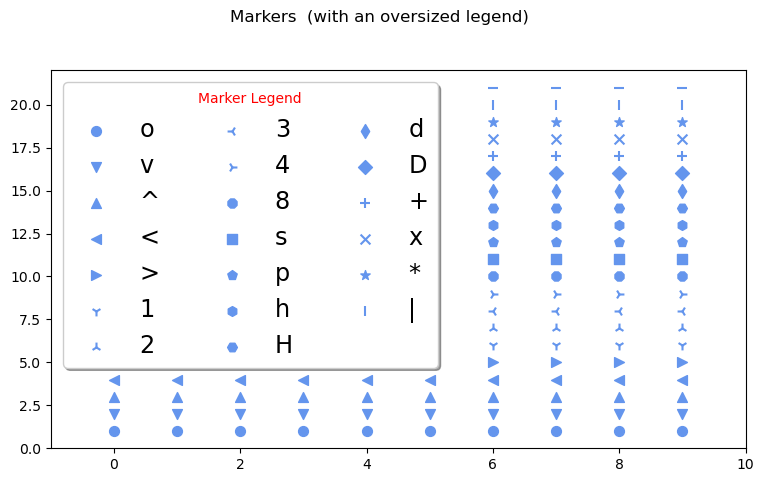

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
markers = list('ov^<>12348sphHdD+x*|_')
n = 10
for i,m in enumerate(markers):
    x = np.arange(n)
    y = np.repeat(i+1,n)
    ax.scatter(x,y,marker=m,label=m,s=50,c='cornflowerblue')

ax.set_xlim((-1,n))
ax.set_ylim((0,len(markers)+1))
ax.legend(loc='upper left',ncol=3, prop={'size':'xx-large'},
         shadow=True,title='Marker Legend')
ax.get_legend().get_title().set_color("red")
fig.suptitle('Markers '+' (with an oversized legend) ')
fig.tight_layout(pad=2);
fig.savefig('filename8.png',dpi=125)

# 6. Bar Plots - Using ax.bar() and ax.barh()

## 6.1 A simple bar chart

The bars in a bar-plot are placed to the right of the bar x-axis location by default. Centred labels require a little 
jiggling with the bar and label positions.

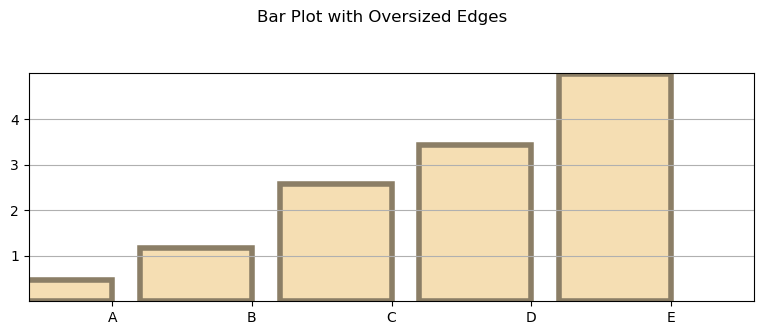

In [1]:
# get the data
n = 5
labels = list('ABCDEFGHIJKLM'[0:n])

import numpy as np

data = np.array(range(n)) + np.random.rand(n)

import matplotlib.pyplot as plt
import matplotlib

# plot the data
fig, ax = plt.subplots(figsize=(8,3.5))
width = 0.8;
tickLocations = np.arange(n)
rectLocations = tickLocations - (width/2.0)
ax.bar(rectLocations, data, width, color='wheat', edgecolor='#8B7E66',
      linewidth=4.0)

# pretty up the plot
ax.set_xticks(ticks=tickLocations)
ax.set_xticklabels(labels)
ax.set_xlim(min(tickLocations) - 0.6,
           max(tickLocations) + 0.6)
ax.set_yticks(range(n)[1:])
ax.set_ylim((0,n))
ax.yaxis.grid(True)

# title and save
fig.suptitle("Bar Plot with " + "Oversized Edges")
fig.tight_layout(pad=2)
fig.savefig('filename9.png',dpi=125)

## 6.2 Side by side bar chart

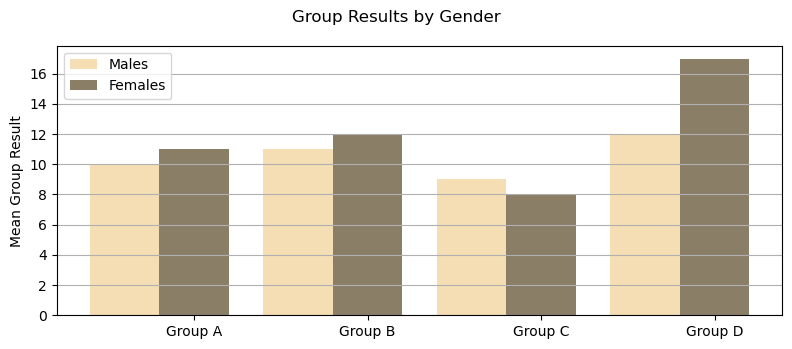

In [2]:
# get the data
before = np.array([10,11,9,12])
after = np.array([11,12,8,17])
labels = ['Group ' + 
          x for x in list('ABCD')]

# the plot - left then right
fig, ax = plt.subplots(figsize=(8,3.5))
width = 0.4 # bar width
xlocs = np.arange(len(before))
ax.bar(xlocs - width,
      before, width, color='wheat', label='Males')
ax.bar(xlocs, after, width, color='#8B7E66', label='Females')

# labels, grids and title, then save
ax.set_xticks(ticks=range(len(before)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Mean Group Result')
fig.suptitle('Group Results by Gender')
fig.tight_layout(pad=1)
fig.savefig('filename10.png',dpi=125)

## 6.3 Stacked bar

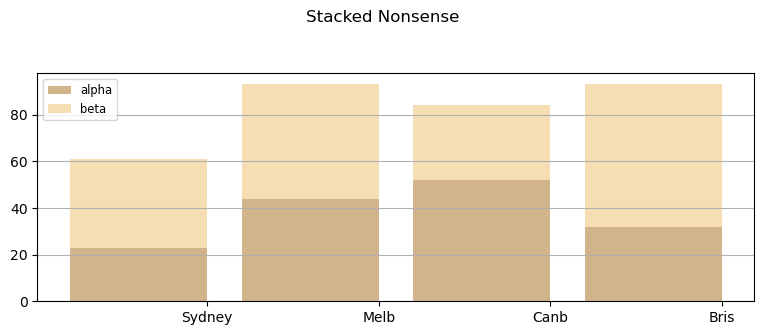

In [7]:
# get some data
alphas = np.array([23,44,52,32])
betas = np.array([38,49,32,61])
labels = ['Sydney','Melb','Canb','Bris']

# the plot
fig, ax = plt.subplots(figsize=(8,3.5))
width = 0.8;
xlocations = np.array(   range( len(alphas) + 2 )   )
adjlocs = xlocations[1:-1] - width/2.0

ax.bar(adjlocs, alphas, width, label='alpha', color='tan')

ax.bar(adjlocs, betas, width, label='beta', color='wheat',
      bottom=alphas)

# pretty up and save
ax.set_xticks(ticks=xlocations[1:-1])
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best', prop={'size':'small'})
fig.suptitle("Stacked Nonsense")
fig.tight_layout(pad=2)
fig.savefig('filename11.png',dpi=125)

## 6.4 Horizontal bar charts

Just as tick placement needs to be managed with 
vertical bars; so with horizontal bars (which are above 
the y-tick mark)

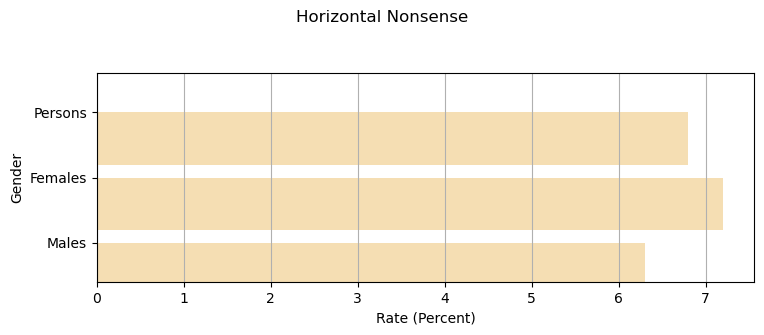

In [13]:
labels = ['Males','Females','Persons']
data = [6.3,7.2,6.8]
width = 0.8
yTickPos = np.arange(len(data))
yBarPos = yTickPos - (width/2.0)
fig, ax = plt.subplots(figsize=(8,3.5))
ax.barh(yBarPos, data, width, color='wheat')
ax.set_yticks(ticks=yTickPos)
ax.set_yticklabels(labels)
ax.set_ylim((
    min(yTickPos) - 0.6,
    max(yTickPos) + 0.6
))
ax.xaxis.grid(True)
ax.set_ylabel('Gender');
ax.set_xlabel('Rate (Percent)')
fig.suptitle("Horizontal Nonsense")
fig.tight_layout(pad=2)
fig.savefig('filename12.png',dpi=125)

# 7. Pie Chart - Using ax.pie()

## 7.1 As nice as pie

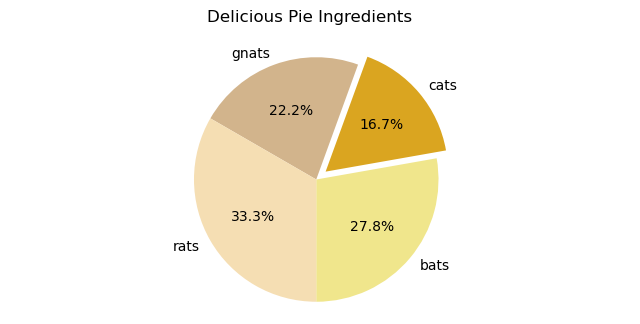

In [15]:
# get some data
data = np.array([5,3,4,6])
labels = ['bats','cats','gnats','rats']
explode = (0,0.1,0,0) # explode cats
colrs = ['khaki','goldenrod','tan','wheat']

# the plot
fig, ax = plt.subplots(figsize=(8,3.5))
ax.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
      startangle=270, colors=colrs)
ax.axis('equal') # keep it a circle

# tidy up and save
fig.suptitle("Delicious Pie Ingredients")
fig.savefig('filename13.png',dpi=125)

# 8. Polar - Using ax.plot()

## 8.1 Polar Coordinates

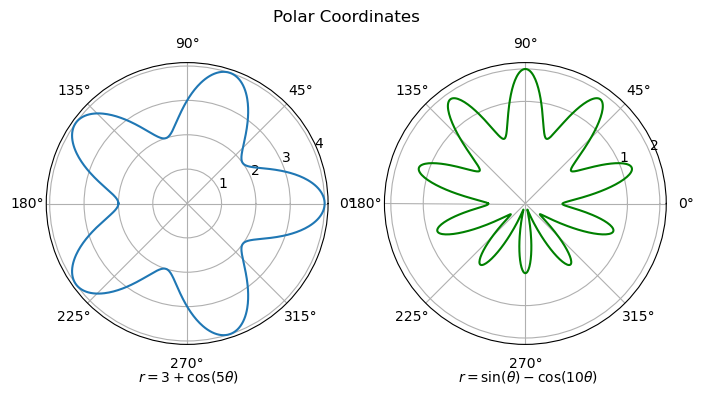

In [17]:
# theta
theta = np.linspace(-np.pi, np.pi, 800)

# get us a Figure
fig = plt.figure(figsize=(8,4))

# left hand plot
ax = fig.add_subplot(1,2,1,polar=True)
r = 3 + np.cos(5*theta)
ax.plot(theta,r)
ax.set_yticks([1,2,3,4])

# right hand plot
ax = fig.add_subplot(1,2,2,polar=True)
r = (np.sin(theta)) - (np.cos(10*theta))
ax.plot(theta,r,color='green')
ax.set_yticks([1,2])

# title, explanatory text and save
fig.suptitle('Polar Coordinates')
fig.text(x=0.24, y=0.05, s=r'$r = 3 + \cos(5 \theta)$')
fig.text(x=0.64, y=0.05,
        s=r'$r = \sin(\theta) - \cos(10' + r'\theta)$')
fig.savefig('filename14.png',dpi=125)

# 9. Plot Spines

## 9.1 Hiding the top and right spines

AttributeError: 'Axes' object has no attribute 'set_axis_bgcolor'

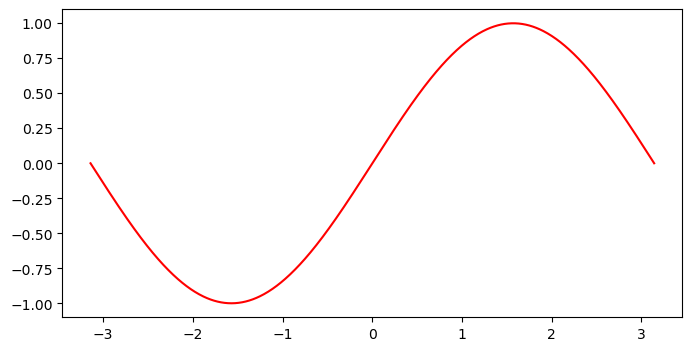

In [26]:
x = np.linspace(-np.pi, np.pi, 800)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, label='Sine', color='red')
ax.set_axis_bgcolor('#e5e5e5')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(
 ('outward',10))
ax.spines['bottom'].set_position(
 ('outward',10))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# do the ax.grid() after setting ticks
ax.grid(b=True, which='both', 
 color='white', linestyle='-', 
 linewidth=1.5)
ax.set_axisbelow(True)
ax.legend(loc='best', frameon=False)
fig.savefig('filename.png', dpi=125)